In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

username = 'postgres'
password = '1234'
hostname = 'localhost'
port = '5432'
database = 'EV'

engine = create_engine(f'postgresql://{username}:{password}@{hostname}:{port}/{database}')

query = '''
        SELECT *
        FROM ev_data
'''

df = pd.read_sql(query, engine)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)

df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


In [15]:
df.describe()

,year,value
count,12654.000000,1.265400e+04
mean,2019.822112,4.273742e+05
std,5.476494,6.860498e+06
min,2010.000000,1.200000e-06
25%,2016.000000,2.000000e+00
50%,2020.000000,1.300000e+02
75%,2022.000000,5.500000e+03
max,2035.000000,4.400000e+08


In [16]:
df.drop(['category'], axis = 1, inplace = True)

In [17]:
df.isnull().sum()

region        0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

In [18]:
df.duplicated().sum()

np.int64(1845)

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.head()

,region,parameter,mode,powertrain,year,unit,value
0,Australia,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,EV stock,Cars,BEV,2012,Vehicles,220.00000


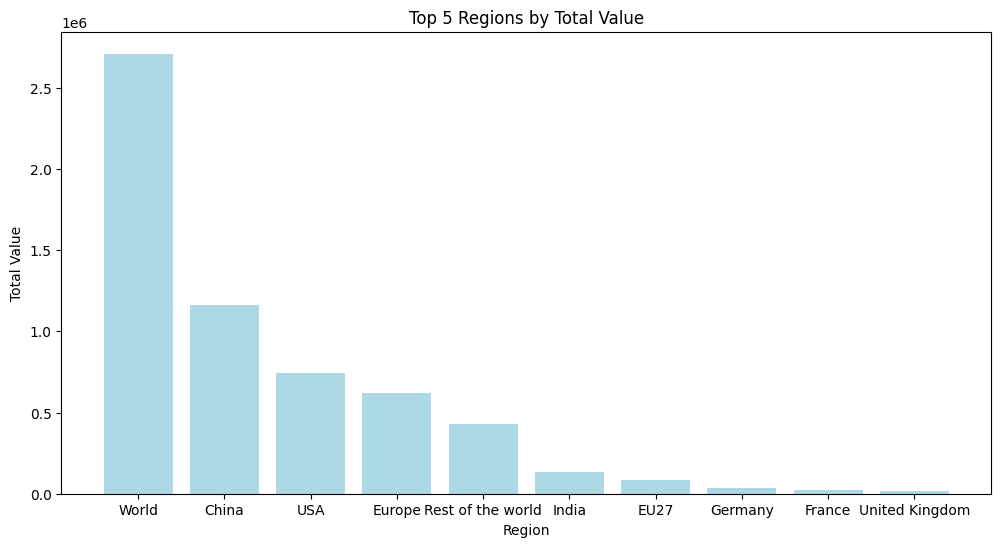

In [21]:
region = df.groupby('region')['value'].mean().sort_values(ascending=False).head(10)
# Plot the results
plt.figure(figsize=(12, 6))
plt.bar(region.index, region.values, color='lightblue')
plt.xlabel('Region')
plt.ylabel('Total Value')
plt.title('Top 5 Regions by Total Value')
plt.show()

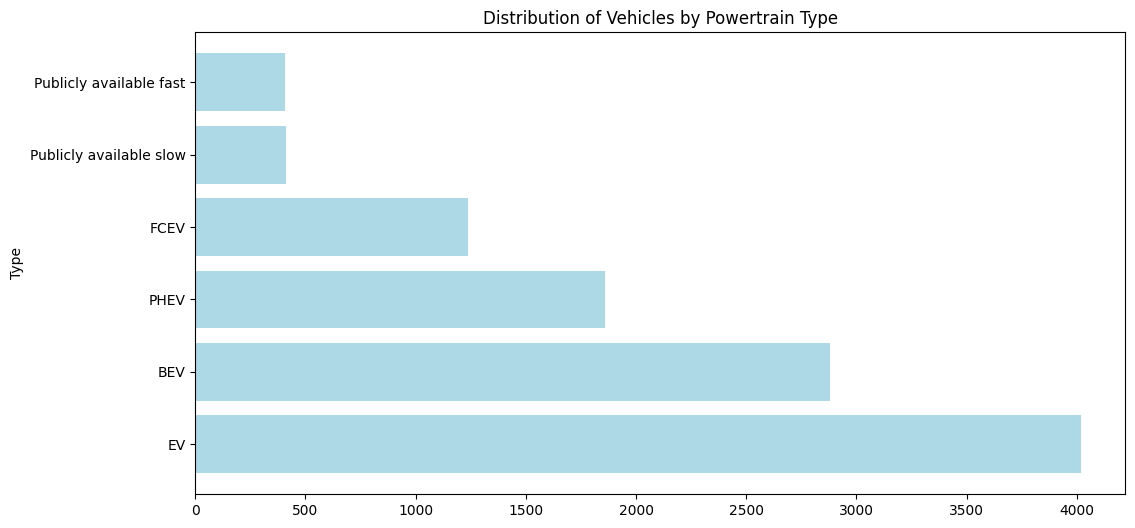

In [22]:
power_train = df['powertrain'].value_counts()
pt_index = power_train.index
pt_values = power_train.values

plt.figure(figsize= (12,6))
plt.barh(pt_index, pt_values, color = 'lightblue')
plt.ylabel('Type')
plt.title('Distribution of Vehicles by Powertrain Type')
plt.show()

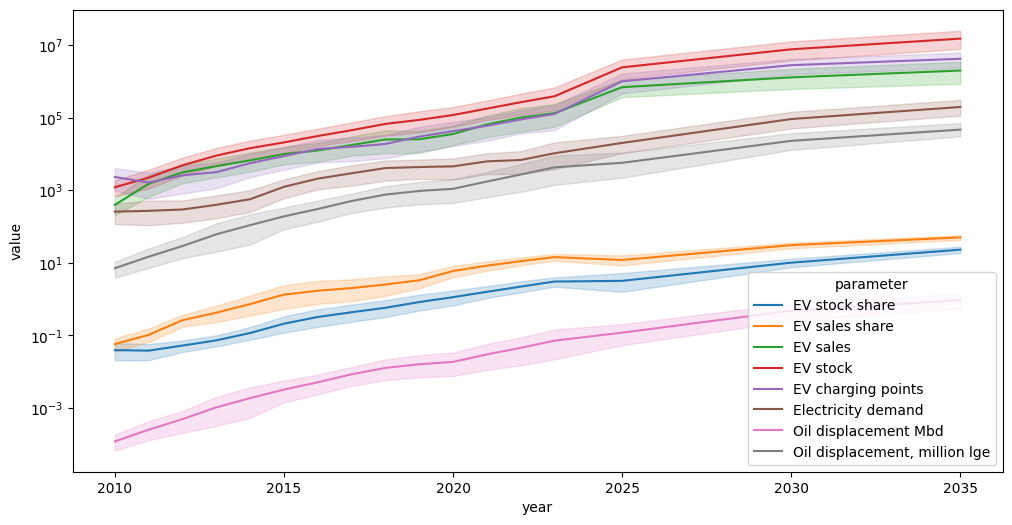

In [23]:
plt.figure(figsize = (12, 6))
sns.lineplot(data = df, x = 'year', y = 'value', hue = 'parameter')
plt.yscale('log') 

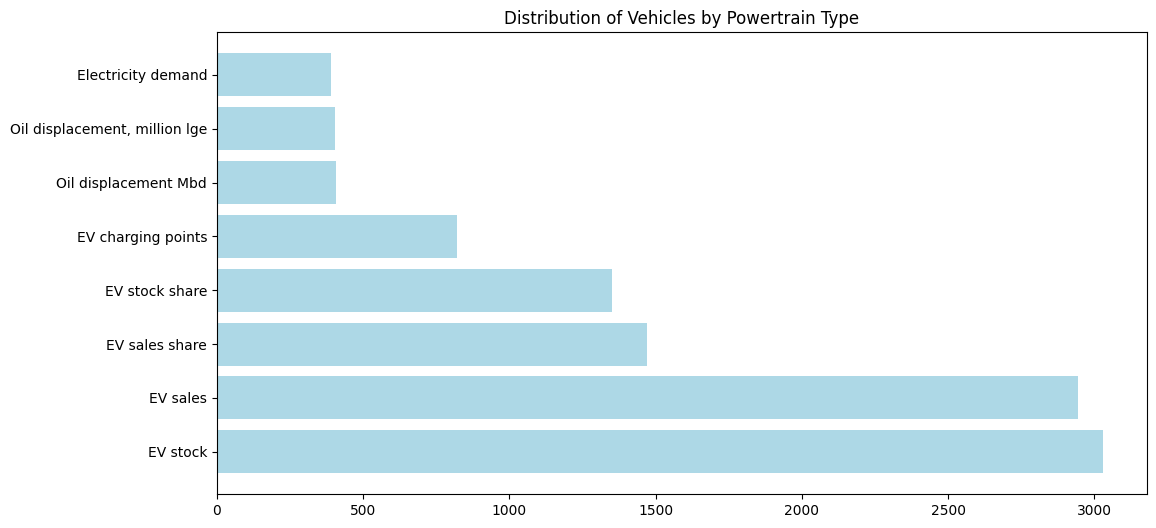

In [24]:
parameter = df['parameter'].value_counts()
pr_index = parameter.index
pr_values = parameter.values

plt.figure(figsize= (12,6))
plt.barh(pr_index, pr_values, color = 'lightblue')
plt.title('Distribution of Vehicles by Powertrain Type')
plt.show()